<a href="https://colab.research.google.com/github/id-shiv/knowledge_base/blob/master/%5BProject_107%5D_Topic_Modelling_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modelling

Reference: https://medium.com/@yanlinc/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6

# Import

In [225]:
# Run in terminal or command prompt
# ! python3 -m spacy download en
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

# Data

In [226]:
texts = """The goal of this testing is to satisfy users and it mainly concentrates on the following parameters of a system:

The effectiveness of the system

Is the system is easy to learn?
Is the system useful and adds value to the target audience?
Are Content, Color, Icons, Images used are aesthetically pleasing?
Efficiency

Little navigation should be required to reach the desired screen or webpage, and scrollbars should be used infrequently.
Uniformity in the format of screen/pages in your application/website.
Option to search within your software application or website.
Accuracy

No outdated or incorrect data like contact information/address should be present.
No broken links should be present.
User Friendliness

Controls used should be self-explanatory and must not require training to operate
Help should be provided for the users to understand the application/website
Alignment with the above goals helps in effective usability testing
How to do Usability Testing: Complete Process
Usability testing process consists of the following phases

Usability Testing Tutorial: Need, Process, Best Practice

Planning:-  During this phase the goals of usability test are determined. Having volunteers sit in front of your application and recording their actions is not a goal. You need to determine critical functionalities and objectives of the system. You need to assign tasks to your testers, which exercise these critical functionalities. During this phase, the usability testing method, number & demographics of usability testers, test report formats are also determined

Recruiting: During this phase, you recruit the desired number of testers as per your usability test plan. Finding testers who match your demographic (age, sex etc.) and professional ( education, job etc.) profile can take time.

Usability Testing: During this phase, usability tests are actually executed.

Data Analysis: Data from usability tests is thoroughly analyzed to derive meaningful inferences and give actionable recommendations to improve the overall usability of your product.

Reporting: Findings of the usability test is shared with all concerned stakeholders which can include designer, developer, client, and CEO

Methods of Usability Testing: 2 Techniques
There are two methods available to do usability testing -

Laboratory Usability Testing
Remote Usability Testing
Laboratory Usability Testing:. This testing is conducted in a separate lab room in presence of the observers. The testers are assigned tasks to execute. The role of the observer is to monitor the behavior of the testers and report the outcome of testing. The observer remains silent during the course of testing.  In this testing, both observers and testers are present in a same physical location.

Remote Usability Testing: Under this testing observers and testers are remotely located. Testers access the System Under Test, remotely and perform assigned tasks. Tester's voice , screen activity , testers facial expressions are recorded by an automated software. Observers analyze this data and report findings of the test. Example of such a software - http://silverbackapp.com/


How many users do you need ?
Usability Testing Tutorial: Need, Process, Best Practice

Research (Virzi, 1992 and Neilsen Landauer, 1993) indicates that 5 users are enough to uncover 80% of usability problems. Some researchers suggest other numbers.

The truth is , the actual number of the user required depends on the complexity of the given application and your usability goals. Increase in usability participants results into increased cost , planning , participant management and data analysis.

But as a general guideline, if you on a small budget and interested in DIY usability testing 5 is a good number to start with. If budget is not a constraint its best consult experienced professionals to determine the number of users.

UX Testing Checklist
The primary goal of this testing is to find crucial usability problems before the product is launched. Following things have to be considered to make a testing success:

Start the UX testing during the early stage of design and development
It's a good practice to conduct usability testing on your competitor's product before you begin development. This will help you determine usability standards for your target audience 
Select the appropriate users to test the system(Can be experts/non-experts users/50-50 of Experts and Non-Experts users)
Use a bandwidth shaper . For instance , your target audience has poor network connectivity , limit network bandwidth to say 56 Kbps for your usability testers. 
Testers need to concentrate on  critical  & frequently used functionalities of the system.
Assign a single observer to each tester. This helps observer to accurately note tester's behavior. If an observer is assigned to multiple testers, results may be compromised
Educate Designers and Developers that this testing outcomes is not a sign of failure but it's a sign of Improvement
Usability Testing Advantages
As with anything in life, usability testing has its merits and de-merits. Let's look at them

It helps uncover usability issues before the product is marketed.
It helps improve end-user satisfaction
It makes your system highly effective and efficient
It helps gather true feedback from your target audience who actually use your system during a usability test. You do not need to rely on "opinions" from random people.
Usability Testing Disadvantages
Cost is a major consideration in usability testing. It takes lots of resources to set up a Usability Test Lab. Recruiting and management of usability testers can also be expensive
However, these costs pay themselves up in form of higher customer satisfaction, retention and repeat business. Usability testing is therefore highly recommended.

"""

# Clean data

In [227]:
documents = texts.split('\n')
documents = [document.strip() for document in documents if len(document) > 1]
documents
len(documents)

53

# EDA

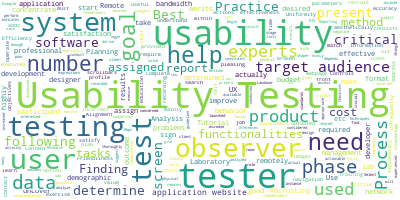

In [228]:
# input : documents (list of document texts)

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = '. '.join(documents)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# Prepare Data

## Words

In [229]:
# break documents into words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

words = list(sent_to_words(documents))

words[:5]

[['the',
  'goal',
  'of',
  'this',
  'testing',
  'is',
  'to',
  'satisfy',
  'users',
  'and',
  'it',
  'mainly',
  'concentrates',
  'on',
  'the',
  'following',
  'parameters',
  'of',
  'system'],
 ['the', 'effectiveness', 'of', 'the', 'system'],
 ['is', 'the', 'system', 'is', 'easy', 'to', 'learn'],
 ['is',
  'the',
  'system',
  'useful',
  'and',
  'adds',
  'value',
  'to',
  'the',
  'target',
  'audience'],
 ['are',
  'content',
  'color',
  'icons',
  'images',
  'used',
  'are',
  'aesthetically',
  'pleasing']]

## Lemmatize

In [230]:
# lemmatization
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy ‘en’ model, keeping only tagger component (for efficiency)
# Run in terminal: python -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])
# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(words, allowed_postags=['NOUN', 'VERB']) #select noun and verb

data_lemmatized[:10]

['goal testing satisfy user concentrate follow parameter system',
 'effectiveness system',
 'system learn',
 'system add value target audience',
 'content color icon image use',
 'efficiency',
 'navigation should require reach desire screen webpage scrollbar should use',
 'uniformity format screen page application website',
 'option search software application website',
 'accuracy']

## Vectorize: Document-Word Matrix

In [231]:
# create document-word matrix
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=2,
# minimum reqd occurences of a word 
                             stop_words='english',             
# remove stop words
                             lowercase=True,                   
# convert all words to lowercase
                            #  token_pattern='[a-zA-Z0-9]{3,}',  
# num chars > 3
                             # max_features=50000,             
# max number of uniq words    
)
data_vectorized = vectorizer.fit_transform(data_lemmatized)

data_vectorized

<53x55 sparse matrix of type '<class 'numpy.int64'>'
	with 226 stored elements in Compressed Sparse Row format>

# Build Model

In [232]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=10,               # Number of topics
                                      max_iter=10,               
# Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          
# Random state
                                      batch_size=32,            
# n docs in each learning iter
                                      evaluate_every = -1,       
# compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               
# Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=32, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


# Analyze

In [233]:
# ! pip install pyldavis

In [234]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -1231.1832298452664
Perplexity:  102.36126636331025
{'batch_size': 32,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 10,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


## Grid search

Determine the best LDA model

In [235]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}
# Init the Model
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(data_vectorized)
GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       iid=True, n_jobs=1,
       param_grid={'n_topics': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv=None, error_score='raise',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method=None,
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=1,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 total_

In [236]:
# Best Model
best_lda_model = model.best_estimator_
print("Best Model: ", model.best_estimator_)
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model:  LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.5,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)
Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -693.2830144663906
Model Perplexity:  327.36609114273995


## Dominant Topic

In [237]:
# Create Document — Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)
# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
# index names
docnames = ["Doc" + str(i) for i in range(len(data))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
# Styling
def color_green(val):
 color = 'green' if val > .1 else 'black'
 return 'color: {col}'.format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)
# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.020000,0.020000,0.850000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,2
Doc1,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc2,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc3,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.700000,0.030000,0.030000,0.030000,6
Doc4,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,1
Doc5,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0
Doc6,0.020000,0.820000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,1
Doc7,0.020000,0.020000,0.020000,0.820000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,3
Doc8,0.030000,0.030000,0.030000,0.770000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,3
Doc9,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0


In [238]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
# View
df_topic_keywords

,analyze,application,assign,audience,behavior,concentrate,conduct,cost,datum,designer,desire,determine,developer,development,execute,finding,follow,format,functionality,goal,help,improve,lab,laboratory,make,management,method,need,number,observer,outcome,phase,plan,practice,problem,process,product,record,report,require,result,satisfaction,screen,software,start,target,task,test,tester,testing,uncover,usability,use,user,website
Topic0,1.139806,0.984566,2.190183,0.483147,1.568150,0.548083,1.087861,0.534063,0.549723,0.544324,1.047726,0.518521,0.416593,0.560087,1.167276,0.984616,0.605125,0.679546,0.487148,0.439904,1.381594,0.587897,1.002382,0.986104,0.504353,0.507652,0.455361,0.518171,0.931438,5.248646,1.049306,0.993590,0.943261,0.511151,0.490509,0.450584,0.454664,1.073053,1.608679,0.612169,1.070083,0.496328,1.113709,1.665153,0.474816,0.572495,1.595609,2.993005,6.700165,3.131821,0.509272,2.078426,0.623202,0.832566,0.971309
Topic1,0.547660,0.470197,0.575967,0.508790,0.493479,0.700710,0.572754,0.515575,0.567543,0.558121,1.095970,0.546411,0.477719,0.542601,0.594318,0.507788,0.699730,0.492463,0.554412,0.576324,1.083629,1.069763,0.477998,0.536230,0.559169,0.486025,0.583511,0.524998,0.614695,0.523557,0.497298,0.475597,0.507664,0.504885,0.626291,0.472171,0.569642,0.482120,0.458316,1.451126,0.543594,1.003002,1.083877,0.490950,0.496111,0.511561,0.465642,0.558685,0.455869,0.555279,0.530730,0.469238,1.863276,1.153797,0.520108
Topic2,0.639004,0.594850,0.510848,0.516917,0.582613,1.004794,0.527075,0.938526,0.541717,0.523572,0.572965,1.065918,0.484611,1.031324,1.166686,0.526223,1.395736,0.551563,0.535736,0.984018,0.463521,0.505100,0.502818,0.992966,0.475216,0.566461,1.515859,2.128422,2.011380,0.514178,0.585319,1.548630,0.553513,1.546103,1.006605,2.051590,0.456682,0.557933,0.500366,0.525738,0.441755,0.981919,0.513568,0.532896,1.672515,0.547082,0.552165,1.567509,0.437835,8.003119,0.940623,7.974780,0.480132,4.089680,0.498916
Topic3,0.505666,2.299368,0.479462,0.532915,0.556574,0.509444,0.546097,1.045039,1.018961,0.467413,0.466870,0.562087,0.520670,0.521892,0.581492,0.510120,0.532752,0.969931,0.523137,1.063862,0.739557,0.475160,0.513500,0.495423,0.574650,1.088471,0.473995,0.449335,1.072477,0.581020,0.506945,0.496190,0.472664,0.507523,0.514995,0.511064,0.535749,0.492722,0.462922,1.020224,1.026225,0.505734,1.003064,1.007037,0.544631,0.527493,0.535948,0.515595,0.476459,0.569530,0.516444,1.604425,0.457223,1.226751,1.677129
Topic4,0.530079,0.975950,1.133633,0.536113,0.511581,0.455249,0.570322,0.584745,0.500268,0.476989,0.448795,2.112636,0.568139,0.531053,0.462543,0.567422,0.693488,1.084039,1.649277,1.659865,0.573955,0.556540,0.522058,0.532732,0.501611,0.541220,1.171061,1.586405,1.090914,0.528488,0.509639,1.597664,1.093642,0.522770,0.491888,0.600758,0.550662,1.064079,1.028643,0.430802,0.503984,0.483078,0.504664,0.652775,0.427243,0.540332,1.037624,1.540038,1.638785,1.165346,0.565974,2.301849,0.570581,0.412520,0.604103
Topic5,0.555098,0.526064,0.538826,0.660407,0.592844,1.191116,0.524719,0.481331,0.524545,0.582448,0.517157,0.454560,0.457332,0.572214,0.596848,0.497454,0.536672,0.541920,1.138652,0.452496,0.487106,0.539875,0.487107,0.423961,0.570643,0.589056,0.531340,1.038274,0.519604,0.538487,0.472906,0.510134,0.507386,0.586817,0.498740,0.574608,0.515593,0.496633,0.592837,0.466821,0.492840,0.537602,0.448247,0.494317,0.537670,0.606404,0.553806,0.530014,1.088194,0.490869,0.476884,0.441128,1.019882,0.475944,0.566657
Topic6,0.517965,0.549793,0.554612,2.394159,0.545205,0.546548,1.028579,0.595739,0.458081,1.070803,0.464299,1.023059,1.056141,1.032798,0.557673,0.572224,0.983631,0.544126,0.561222,1.477292,2.077812,0.472133,0.525563,0.605929,0.995460,0.510799,0.485797,1.062785,0.523943,0.596464,1.101672,0.482302,0.578999,1.047208,0.986688,0.425947,1.506129,0.549999,0.510779,0.484562,0.485133,0.548278,0.507188,0.497943,0.438929,2.391113,0.441362,1.008430,0.840046,3.190452,0.500594,3.628961,1.375267,0.405481,0.526537
Topic7,1.173413,0.460139,0.448408,0.679089,0.491343,0.537

## Top N keywords of each topic

In [239]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,tester,observer,testing,test,assign,usability,software,report,task,behavior,help,execute,analyze,screen,conduct
Topic 1,use,require,user,desire,screen,help,improve,satisfaction,concentrate,follow,problem,number,execute,method,goal
Topic 2,testing,usability,user,need,process,number,start,test,phase,practice,method,follow,execute,determine,development
Topic 3,application,website,usability,user,management,number,goal,cost,result,require,datum,software,screen,format,help
Topic 4,usability,determine,goal,functionality,tester,phase,need,test,method,testing,assign,plan,number,format,record
Topic 5,concentrate,functionality,tester,need,use,audience,target,execute,behavior,report,management,practice,designer,process,development
Topic 6,usability,testing,audience,target,help,product,goal,use,outcome,designer,need,developer,practice,development,conduct
Topic 7,usability,test,product,tester,management,analyze,testing,uncover,datum,designer,improve,developer,lab,process,report
Topic 8,datum,tester,plan,desire,management,practice,phase,test,format,number,concentrate,screen,execute,need,observer
Topic 9,make,use,testing,product,require,conduct,goal,usability,plan,need,method,satisfaction,lab,problem,functionality


# Predict

In [240]:
# Define function to predict topic for a given text document.
nlp = spacy.load('en', disable=['parser', 'ner'])
def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization
# Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))
# Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)
# Step 4: LDA Transform
    topic_probability_scores = best_lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), 1:14].values.tolist()
    
    # Step 5: Infer Topic
    infer_topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), -1]
    
    #topic_guess = df_topic_keywords.iloc[np.argmax(topic_probability_scores), Topics]
    return infer_topic, topic, topic_probability_scores
# Predict the topic
mytext = ["Very Useful in diabetes age 30. I need control sugar. thanks Good deal"]
infer_topic, topic, prob_scores = predict_topic(text = mytext)
print(topic)
print(infer_topic)

['observer', 'testing', 'test', 'assign', 'usability', 'software', 'report', 'task', 'behavior', 'help', 'execute', 'analyze', 'screen']
conduct


## Test

In [245]:
def apply_predict_topic(text):
 text = [text]
 infer_topic, topic, prob_scores = predict_topic(text = text)
 return(infer_topic)
[{document: apply_predict_topic(document)} for document in documents]

[{'The goal of this testing is to satisfy users and it mainly concentrates on the following parameters of a system:': 'development'},
 {'The effectiveness of the system': 'conduct'},
 {'Is the system is easy to learn?': 'conduct'},
 {'Is the system useful and adds value to the target audience?': 'conduct'},
 {'Are Content, Color, Icons, Images used are aesthetically pleasing?': 'goal'},
 {'Efficiency': 'conduct'},
 {'Little navigation should be required to reach the desired screen or webpage, and scrollbars should be used infrequently.': 'goal'},
 {'Uniformity in the format of screen/pages in your application/website.': 'help'},
 {'Option to search within your software application or website.': 'help'},
 {'Accuracy': 'conduct'},
 {'No outdated or incorrect data like contact information/address should be present.': 'observer'},
 {'No broken links should be present.': 'conduct'},
 {'User Friendliness': 'conduct'},
 {'Controls used should be self-explanatory and must not require training 

# Cluster

In [242]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)
# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)
# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]
# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))
# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

Component's weights: 
 [[ 0.06  0.06  0.98  0.06  0.04  0.05  0.09  0.07  0.05  0.05]
 [ 0.16  0.11 -0.14  0.13  0.06  0.06  0.93  0.2   0.06  0.06]]
Perc of Variance Explained: 
 [0.25 0.16]


## Plot

Text(0.5, 1.0, 'Segregation of Topic Clusters')

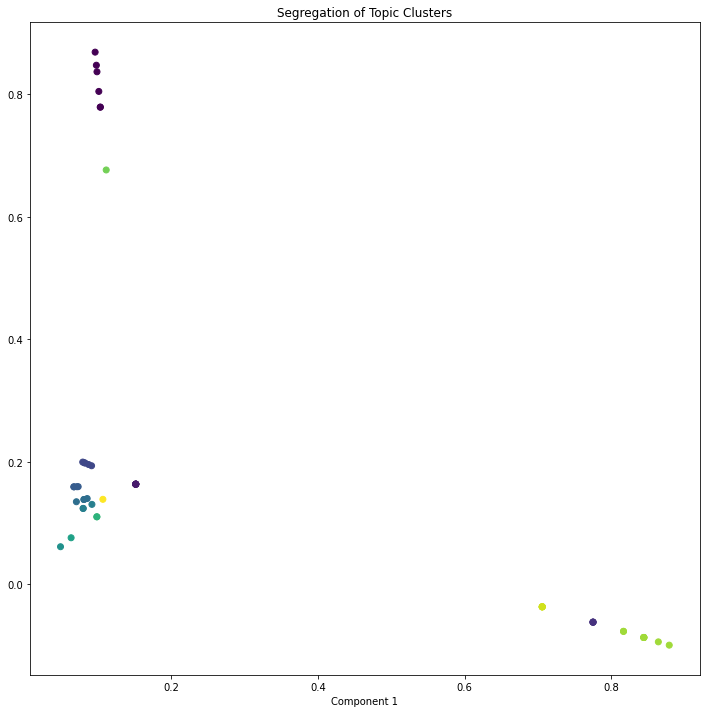

In [243]:
# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

## Get similar texts

In [244]:
from sklearn.metrics.pairwise import euclidean_distances
nlp = spacy.load('en', disable=['parser', 'ner'])
def similar_documents(text, doc_topic_probs, documents = data, nlp=nlp, top_n=5, verbose=False):
    _, topic, x  = predict_topic(text)
    dists = euclidean_distances(x.reshape(1, -1), doc_topic_probs)[0]
    doc_ids = np.argsort(dists)[:top_n]
    if verbose:        
        print("Topic KeyWords: ", topic)
        print("Topic Prob Scores of text: ", np.round(x, 1))
        print("Most Similar Doc's Probs:  ", np.round(doc_topic_probs[doc_ids], 1))
    return doc_ids, np.take(documents, doc_ids)

mytext = ["I think they are really helpful"]
doc_ids, docs = similar_documents(text=mytext, doc_topic_probs=lda_output, documents = data, top_n=1, verbose=True)
print('\n', docs[0][:500])
print()

Topic KeyWords:  ['observer', 'testing', 'test', 'assign', 'usability', 'software', 'report', 'task', 'behavior', 'help', 'execute', 'analyze', 'screen']
Topic Prob Scores of text:  [[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
Most Similar Doc's Probs:   [[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]

 user friendliness

